In [1]:
# الخلية 1: استيراد المكتبات
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# إعدادات العرض لـ Pandas (اختياري، لتحسين كيفية عرض الـ DataFrames)
pd.set_option('display.max_columns', None) # عرض جميع الأعمدة
pd.set_option('display.max_rows', 100)      # عرض حتى 100 صف
pd.set_option('display.width', 1000)       # عرض أوسع للـ DataFrame
pd.set_option('display.float_format', '{:.2f}'.format) # تنسيق الأرقام العشرية

# إعدادات الرسوم البيانية (اختياري)
plt.style.use('seaborn-v0_8-whitegrid') # اختيار نمط للرسوم البيانية
sns.set_palette("viridis") # اختيار لوحة ألوان

print("المكتبات الأساسية تم استيرادها بنجاح!")

المكتبات الأساسية تم استيرادها بنجاح!


In [2]:
print(9)

9


In [3]:
# الخلية 2: تحميل البيانات المعالجة (مع تحديد تحليل التواريخ)
import pandas as pd # تأكد من استيراد pandas إذا كانت هذه أول خلية تشغلها في جلسة جديدة
import os

# تحديد مسار ملف البيانات المعالجة
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
processed_data_path = os.path.join(project_root, 'data', 'processed', 'processed_problems_data.csv')

print(f"المسار المحسوب لملف البيانات: {processed_data_path}")

# --- التعديل هنا ---
# قائمة بأسماء الأعمدة التي نعرف أنها يجب أن تكون تواريخ
date_columns_to_parse = ['date_identified', 'date_closed', 'date_chosen', 
                         'start_date_planned', 'end_date_planned', 
                         'start_date_actual', 'end_date_actual']

# تحميل البيانات مع تحديد parse_dates
try:
    df = pd.read_csv(
        processed_data_path, 
        parse_dates=date_columns_to_parse, # اطلب من Pandas تحليل هذه الأعمدة كتواريخ
        dayfirst=False # اضبط هذا إذا كان تنسيق تاريخك يوم/شهر/سنة (الشائع في بعض المناطق)
                       # إذا كان شهر/يوم/سنة أو ISO (سنة-شهر-يوم)، فإن False أو تركه جيد
    )
    print(f"\nتم تحميل البيانات بنجاح! أبعاد الـ DataFrame: {df.shape}")
    
    # تحقق سريع من أنواع البيانات بعد التحميل
    print("\nأنواع البيانات بعد التحميل (للتحقق من التواريخ):")
    print(df[date_columns_to_parse].info())

except FileNotFoundError:
    print(f"\nخطأ: لم يتم العثور على ملف البيانات في المسار: {processed_data_path}")
    print("يرجى التأكد من تشغيل data_preprocessor.py أولاً وأن الملف موجود.")
    df = pd.DataFrame()
except Exception as e:
    print(f"\nحدث خطأ آخر أثناء تحميل البيانات: {e}")
    df = pd.DataFrame()

المسار المحسوب لملف البيانات: C:\Users\pc\PycharmProjects\pythonProject\problem_ai_advisor\data\processed\processed_problems_data.csv

تم تحميل البيانات بنجاح! أبعاد الـ DataFrame: (8, 52)

أنواع البيانات بعد التحميل (للتحقق من التواريخ):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date_identified     8 non-null      datetime64[ns]
 1   date_closed         1 non-null      datetime64[ns]
 2   date_chosen         3 non-null      datetime64[ns]
 3   start_date_planned  2 non-null      datetime64[ns]
 4   end_date_planned    3 non-null      datetime64[ns]
 5   start_date_actual   1 non-null      datetime64[ns]
 6   end_date_actual     2 non-null      datetime64[ns]
dtypes: datetime64[ns](7)
memory usage: 580.0 bytes
None


In [4]:
# الخلية 3: نظرة عامة على البيانات
if not df.empty:
    print("\n--- أول 5 صفوف من البيانات ---")
    display(df.head()) # display() تعرض الـ DataFrame بشكل أفضل في Jupyter

    print("\n--- معلومات عامة عن الـ DataFrame ---")
    df.info()

    print("\n--- إحصائيات وصفية للأعمدة الرقمية ---")
    # نصف فقط الأعمدة الرقمية التي أنشأناها أو التي كانت رقمية
    numeric_cols_to_describe = ['sentiment_score', 'estimated_cost_numeric',
                                'overall_budget_numeric', 'estimated_time_days',
                                'resolution_time_days_calc']
    # تحقق من وجود الأعمدة قبل محاولة وصفها
    existing_numeric_cols = [col for col in numeric_cols_to_describe if col in df.columns]
    if existing_numeric_cols:
        display(df[existing_numeric_cols].describe())
    else:
        print("لا توجد أعمدة رقمية محددة للوصف.")
else:
    print("الـ DataFrame فارغ، لا يمكن عرض معلومات.")


--- أول 5 صفوف من البيانات ---


,problem_id,title,description_initial,domain,complexity_level,date_identified,date_closed,status,stakeholders_involved,initial_impact_assessment,problem_source,refined_problem_statement_final,sentiment_score,sentiment_label,problem_tags,ai_generated_summary,active_listening_notes,key_questions_asked,initial_data_sources,initial_hypotheses,stakeholder_feedback_initial,data_collection_methods_deep,data_analysis_techniques_used,key_findings_from_analysis,justification_for_choice,approval_status,date_chosen,solution_description,generation_method,estimated_cost,estimated_time_to_implement,potential_benefits,potential_risks,plan_description,implementation_status,start_date_planned,end_date_planned,start_date_actual,end_date_actual,overall_budget,key_personnel,what_went_well,what_could_be_improved,recommendations_for_future,key_takeaways,potential_root_causes_list,estimated_cost_numeric,overall_budget_numeric,estimated_time_days,resolution_time_days_calc,combined_text_for_nlp,processed_text
0,1,حب من جهة واحدة,NaN,NaN,NaN,2025-05-29 15:01:37.823552,NaT,مفتوحة,NaN,NaN,NaN,NaN,0.00,محايد,بنت احترمها كثيرا و اهتم بها,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.00,50.00,0.65,NaN,حب من جهة واحدة None None None None None ...,حب جهه واحده
1,3,انخفاض ملحوظ في تفاعل الطلاب مع منصة التعلم ال...,لاحظ قسم تكنولوجيا المعلومات وفريق الشؤون الأك...,تعليم عالي - تكنولوجيا,متوسط,2025-05-30 03:16:40.540326,NaT,مفتوحة,إدارة الجامعة، عمداء الكليات، أعضاء هيئة التدر...,أثير سلبي محتمل على جودة التعلم عن بعد، رضا ال...,تقارير استخدام النظام + شكاوى الطلاب.,"انخفاض تفاعل الطلاب مع منصة ""نور أكاديمي"" بنسب...",0.00,NaN,NaN,NaN,"الطلاب: ""المنصة بطيئة أحيانًا، بعض الواجهات مر...",ا ما هي أكثر الميزات التي يشتكي منها الطلاب؟\r...,سجلات استخدام النظام (Google Analytics للمنصة،...,قد تكون المشكلة بسبب سوء تصميم واجهة المستخدم....,الإدارة قلقة وتطلب حلاً سريعًا. أعضاء هيئة ال...,استبيان شامل لـ 200 طالب وعضو هيئة تدريس.\r\nت...,تحليل إحصائي لبيانات الاستبيان.\r\nتحليل مسارا...,80% من الشكاوى تتركز حول بطء تحميل الصفحات وصع...,NaN,مختار,2025-05-30 03:55:12.476412,إعادة تصميم شامل لواجهة المستخدم (UI) وتجربة ا...,ورشة عمل مع مصممين ومستخدمين، دراسة أفضل المما...,عالي (توظيف مصممين، وقت تطوير),6-9 أشهر,تحسين كبير في سهولة الاستخدام ورضا الطلاب، زي...,تكلفة عالية، قد يتطلب تغييرًا كبيرًا في الكود،...,: خطة لتحليل وتحسين استعلامات قاعدة البيانات ا...,قيد التنفيذ,NaT,2025-05-30,NaT,2025-07-30,200 ساعة عمل مطورين,: فريق مطوري قواعد البيانات، مدير قسم IT.,: تحديد الأسباب الجذرية بدقة ساعد في توجيه الح...,كان يجب إشراك عينة أكبر من الطلاب في مراحل اخ...,إجراء مراجعات دورية لأداء المنصة وتجربة المستخ...,الاستثمار في تجربة المستخدم أمر حاسم. المشاكل...,نقص التدريب الكافي للطلاب وأعضاء هيئة التدريس ...,10000.00,200.00,225.00,NaN,انخفاض ملحوظ في تفاعل الطلاب مع منصة التعلم ال...,انخفاض ملحوظ تفاعل الطلاب منصه التعلم الالكترو...
2,4,مفاتيح السيارة ضاعت مني,ذهبت الى النادي و بعدها لم اجد المفاتيح,NaN,NaN,2025-05-31 19:17:37.846490,NaT,مفتوحة,NaN,NaN,NaN,NaN,0.00,محايد,ذهبت الى النادي و بعدها لم اجد المفاتيح,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.00,50.00,0.65,NaN,مفاتيح السيارة ضاعت مني ذهبت الى النادي و بعده...,مفاتيح السياره ضاعت مني ذهبت الي النادي بعدها ...
3,5,أختناق مروري,NaN,NaN,NaN,2025-06-01 05:33:49.262662,NaT,مفتوحة,NaN,NaN,NaN,NaN,0.00,محايد,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.00,50.00,0.65,NaN,أختناق مروري None None None None None,اختناق مروري
4,10,موبايل مكسور,جوالي نوع جالاكسى اشتريتة من شركة جالاكسى بارب...,تقني,بسيط,2025-06-03 10:06:19.501127,NaT,قيد التحليل,انا,مالي,ملاحظة,NaN,0.00,محايد,"جوالي, نوع, جالاكسى, اشتريتة, شركة, باربيل, سع...",جوالي نوع جالاكسى اشتريتة من شركة جالاكسى بارب...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,Na


--- معلومات عامة عن الـ DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   problem_id                       8 non-null      int64         
 1   title                            8 non-null      object        
 2   description_initial              6 non-null      object        
 3   domain                           5 non-null      object        
 4   complexity_level                 5 non-null      object        
 5   date_identified                  8 non-null      datetime64[ns]
 6   date_closed                      1 non-null      datetime64[ns]
 7   status                           8 non-null      object        
 8   stakeholders_involved            5 non-null      object        
 9   initial_impact_assessment        5 non-null      object        
 10  problem_source             

,sentiment_score,estimated_cost_numeric,overall_budget_numeric,estimated_time_days,resolution_time_days_calc
count,8.00,8.00,8.00,8.00,1.00
mean,0.00,1276.88,63.12,28.61,0.00
std,0.00,3524.69,57.50,79.35,NaN
min,0.00,5.00,5.00,0.00,0.00
25%,0.00,35.00,50.00,0.65,0.00
50%,0.00,35.00,50.00,0.65,0.00
75%,0.00,35.00,50.00,0.65,0.00
max,0.00,10000.00,200.00,225.00,0.00



--- استكشاف الأعمدة الفئوية ---

--- العمود: domain ---
القيم الفريدة وعدد مرات ظهورها:
domain
NaN                       3
تقني                      2
تعليم عالي - تكنولوجيا    1
شخصي - صيانة سيارة        1
شخصي                      1
Name: count, dtype: int64
النسبة المئوية لكل قيمة:
domain
NaN                      37.50
تقني                     25.00
تعليم عالي - تكنولوجيا   12.50
شخصي - صيانة سيارة       12.50
شخصي                     12.50
Name: proportion, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_380\2411808396.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis")


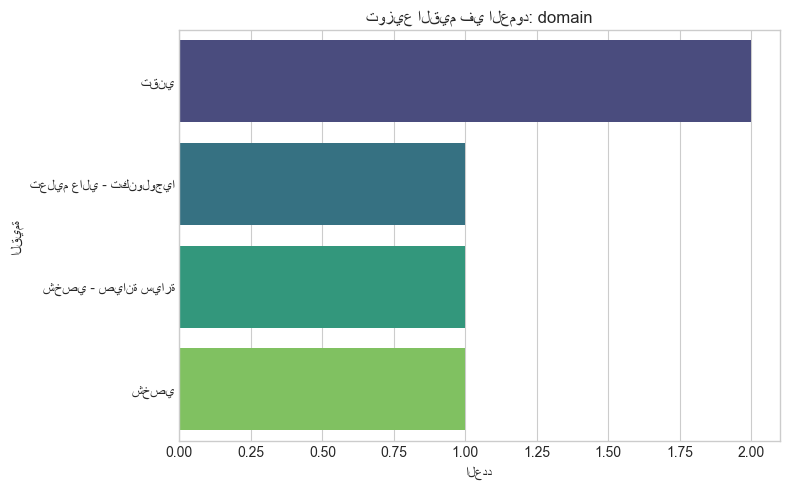


--- العمود: complexity_level ---
القيم الفريدة وعدد مرات ظهورها:
complexity_level
NaN      3
بسيط     3
متوسط    2
Name: count, dtype: int64
النسبة المئوية لكل قيمة:
complexity_level
NaN     37.50
بسيط    37.50
متوسط   25.00
Name: proportion, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_380\2411808396.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis")


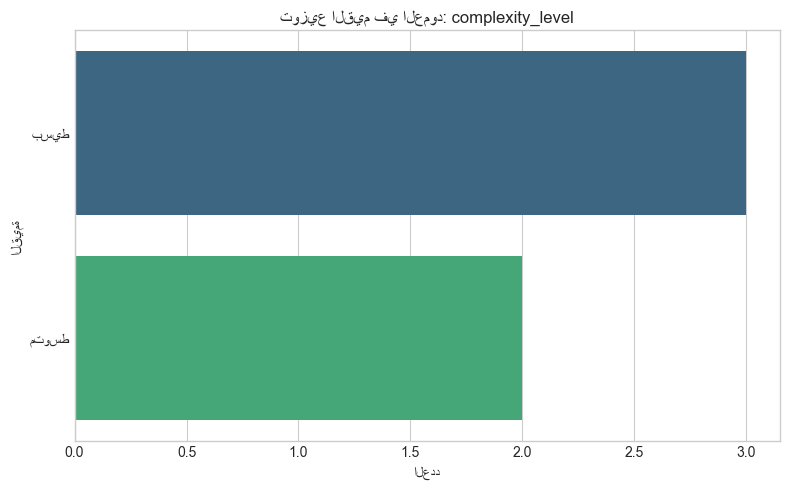


--- العمود: status ---
القيم الفريدة وعدد مرات ظهورها:
status
مفتوحة         5
قيد التحليل    2
مغلقة          1
Name: count, dtype: int64
النسبة المئوية لكل قيمة:
status
مفتوحة        62.50
قيد التحليل   25.00
مغلقة         12.50
Name: proportion, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_380\2411808396.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis")


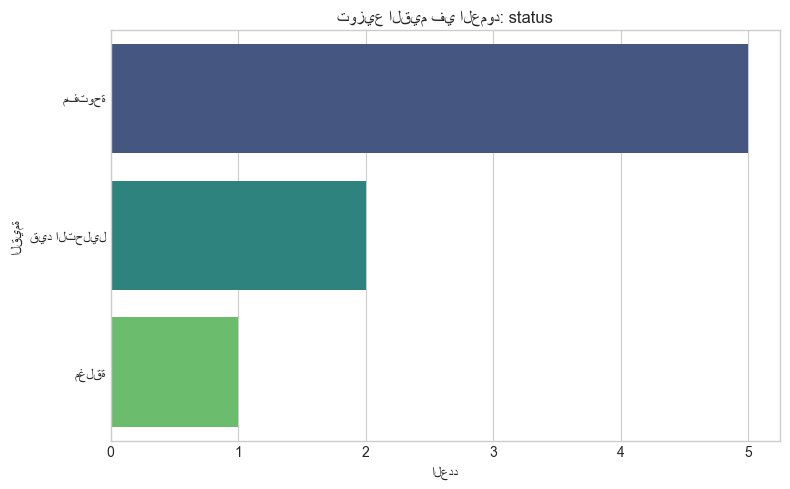


--- العمود: problem_source ---
القيم الفريدة وعدد مرات ظهورها:
problem_source
NaN                                      3
ملاحظة                                   3
تقارير استخدام النظام + شكاوى الطلاب.    1
ملاحظة شخصية عند فحص السيارة             1
Name: count, dtype: int64
النسبة المئوية لكل قيمة:
problem_source
NaN                                     37.50
ملاحظة                                  37.50
تقارير استخدام النظام + شكاوى الطلاب.   12.50
ملاحظة شخصية عند فحص السيارة            12.50
Name: proportion, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_380\2411808396.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis")


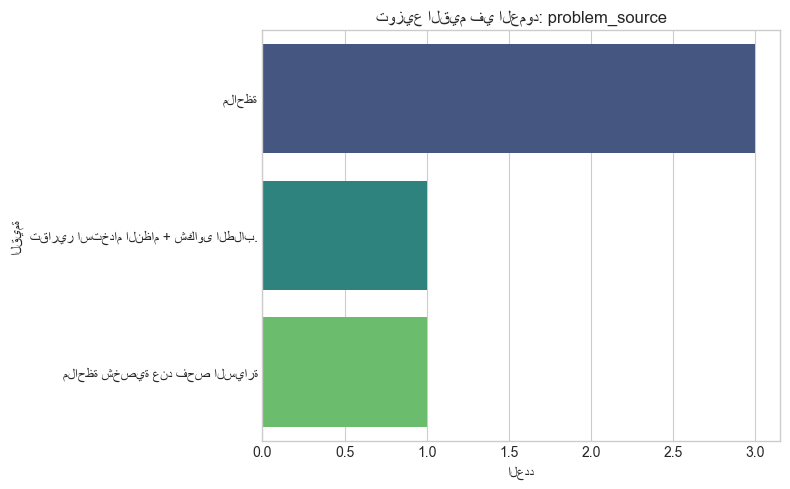


--- العمود: sentiment_label ---
القيم الفريدة وعدد مرات ظهورها:
sentiment_label
محايد    7
NaN      1
Name: count, dtype: int64
النسبة المئوية لكل قيمة:
sentiment_label
محايد   87.50
NaN     12.50
Name: proportion, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_380\2411808396.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis")


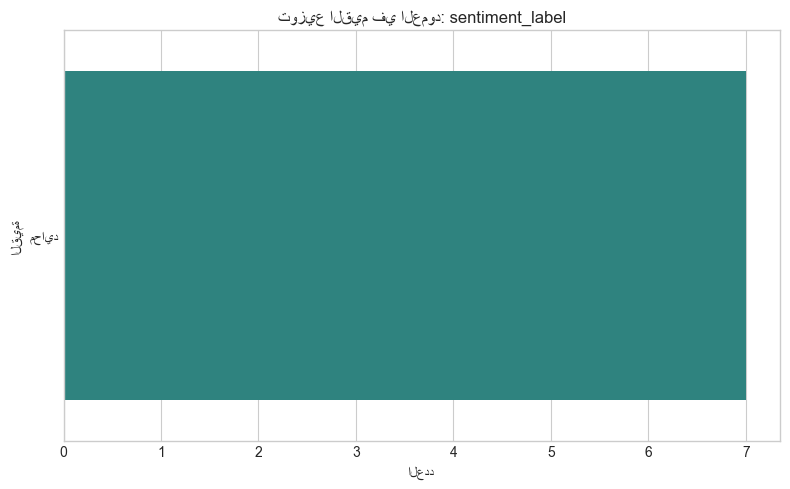


--- العمود: approval_status ---
القيم الفريدة وعدد مرات ظهورها:
approval_status
NaN      5
مختار    3
Name: count, dtype: int64
النسبة المئوية لكل قيمة:
approval_status
NaN     62.50
مختار   37.50
Name: proportion, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_380\2411808396.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis")


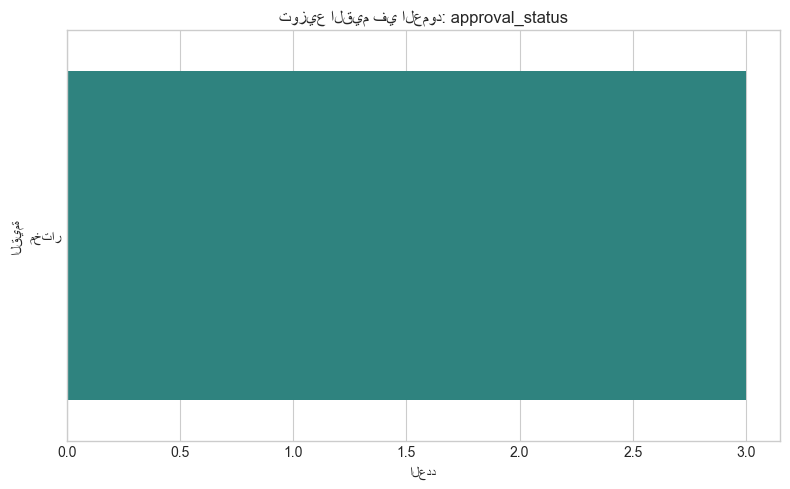


--- العمود: implementation_status ---
القيم الفريدة وعدد مرات ظهورها:
implementation_status
NaN            5
قيد التنفيذ    2
لم يبدأ        1
Name: count, dtype: int64
النسبة المئوية لكل قيمة:
implementation_status
NaN           62.50
قيد التنفيذ   25.00
لم يبدأ       12.50
Name: proportion, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_380\2411808396.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis")


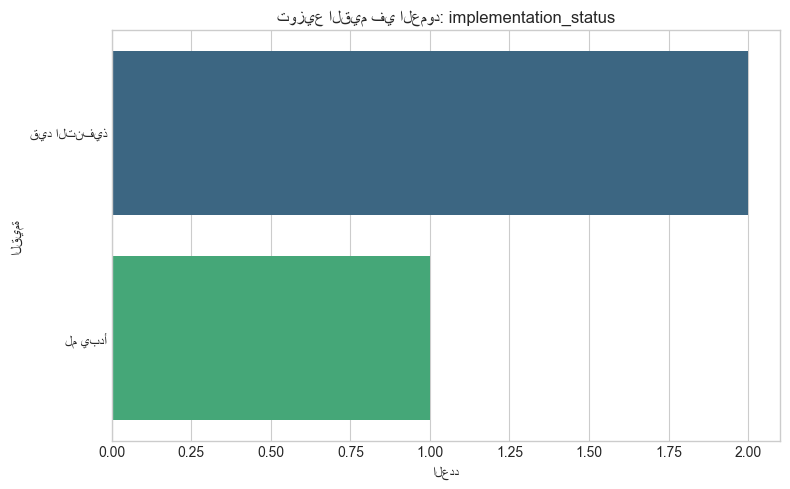

In [5]:
# الخلية 4: استكشاف الأعمدة الفئوية
if not df.empty:
    print("\n--- استكشاف الأعمدة الفئوية ---")
    categorical_cols = ['domain', 'complexity_level', 'status', 'problem_source', 'sentiment_label', 'approval_status', 'implementation_status']
    
    for col in categorical_cols:
        if col in df.columns:
            print(f"\n--- العمود: {col} ---")
            print(f"القيم الفريدة وعدد مرات ظهورها:\n{df[col].value_counts(dropna=False)}") # dropna=False لإظهار القيم المفقودة إن وجدت
            print(f"النسبة المئوية لكل قيمة:\n{df[col].value_counts(normalize=True, dropna=False) * 100}")
            
            # رسم بياني بسيط للعمود الفئوي
            if df[col].nunique() < 15 : # ارسم فقط إذا كان عدد القيم الفريدة معقولاً
                plt.figure(figsize=(8, 5))
                sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis")
                plt.title(f'توزيع القيم في العمود: {col}')
                plt.xlabel('العدد')
                plt.ylabel('القيمة')
                plt.tight_layout()
                plt.show()
        else:
            print(f"العمود {col} غير موجود في الـ DataFrame.")
else:
    print("الـ DataFrame فارغ.")


--- استكشاف عمود processed_text ---

عينة من النصوص في 'processed_text':
1: حب جهه واحده
2: انخفاض ملحوظ تفاعل الطلاب منصه التعلم الالكتروني لاحظ قسم تكنولوجيا المعلومات وفريق الشوون الاكاديميه انخفاضا بنسبه متوسط الوقت يقضيه الطلاب منصه نور اكاديمي خلال الفصل الدراسي الحالي مقارنه بالفصل السابق زادت الشكاوي صعوبه استخدام الميزات انخفاض تفاعل الطلاب منصه نور اكاديمي بنسبه يعزي بشكل رييسي الي تجربه مستخدم سييه ناتجه تصميم واجهه معقد وغير بديهي خاصه قسم المواد الدراسيه ونظام البحث مشاكل اداء وبطء تحميل الصفحات بسبب قدم البنيه التحتيه للخوادم وعدم تحسين استعلامات قاعده البيانات نظام اشعارات مربك وغير فعال اداره الجامعه عمداء الكليات اعضاء هييه التدريس الطلاب قسم تكنولوجيا المعلومات فريق تطوير المنصه اثير سلبي محتمل جوده التعلم رضا الطلاب وسمعه الجامعه تقديم خدمات تعليميه رقميه يودي الي تراجع معدلات اكمال المقررات تقارير استخدام النظام شكاوي الطلاب الطلاب المنصه بطييه احيانا الواجهات مربكه الصعب العثور المواد بسرعه خاصيه المناقشات فعاله اعضاء هييه التدريس رفع المواد يستغرق وقتا ادوات التق

count     8.00
mean     83.75
std     128.84
min       2.00
25%       8.25
50%      22.00
75%     100.00
max     375.00
Name: processed_text_length, dtype: float64

C:\Users\pc\AppData\Local\Temp\ipykernel_380\1465435003.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['processed_text_length'], kde=True, bins=15, palette="viridis") # أضفت palette هنا أيضًا


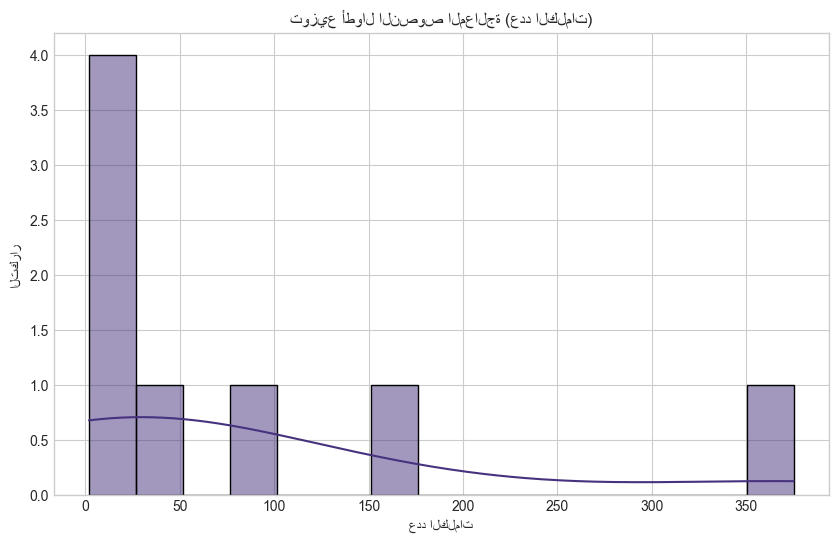

تم العثور على الخط: C:/Windows/Fonts/Tahoma.ttf


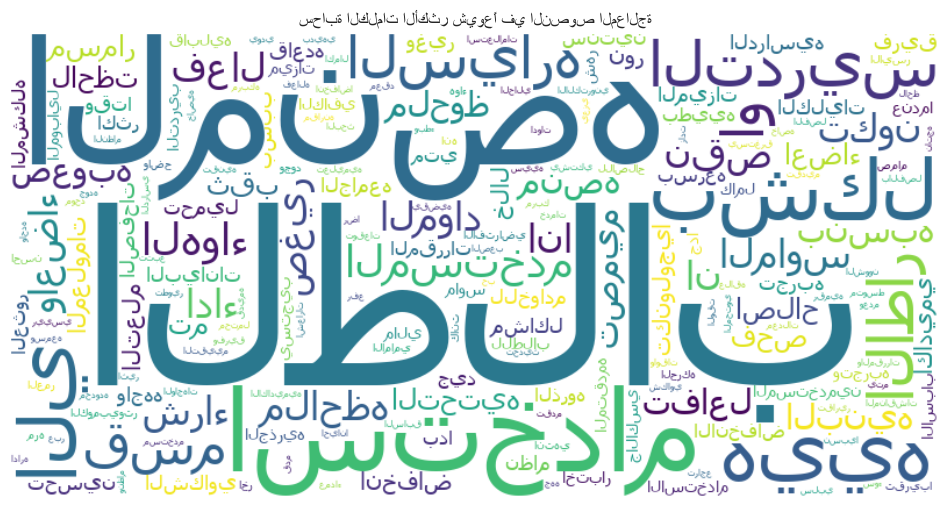

In [6]:
# الخلية 5: استكشاف عمود processed_text
if not df.empty and 'processed_text' in df.columns:
    print("\n--- استكشاف عمود processed_text ---")
    
    # عرض عينة من النصوص المعالجة
    print("\nعينة من النصوص في 'processed_text':")
    for i, text in enumerate(df['processed_text'].head().tolist()):
        print(f"{i+1}: {text}")

    # حساب طول النصوص المعالجة
    df['processed_text_length'] = df['processed_text'].apply(lambda x: len(str(x).split()))
    
    print("\nإحصائيات حول طول النصوص المعالجة (عدد الكلمات):")
    display(df['processed_text_length'].describe())
    
    # رسم بياني لتوزيع أطوال النصوص
    plt.figure(figsize=(10, 6))
    sns.histplot(df['processed_text_length'], kde=True, bins=15, palette="viridis") # أضفت palette هنا أيضًا
    plt.title('توزيع أطوال النصوص المعالجة (عدد الكلمات)')
    plt.xlabel('عدد الكلمات')
    plt.ylabel('التكرار')
    plt.show()
    
    # عرض الكلمات الأكثر شيوعًا (باستخدام WordCloud)
    # تأكد من أن مكتبة wordcloud مثبتة: pip install wordcloud
    from wordcloud import WordCloud
    
    # دمج جميع النصوص المعالجة في نص واحد كبير
    # تأكد من أن النصوص ليست فارغة لتجنب أخطاء في WordCloud
    # قم بتصفية النصوص الفارغة أو التي تحتوي فقط على مسافات
    non_empty_texts = df['processed_text'].dropna().loc[df['processed_text'].str.strip() != '']
    
    if not non_empty_texts.empty:
        full_processed_text = " ".join(non_empty_texts)

        # قد تحتاج إلى تحديد مسار لخط عربي إذا لم تظهر الكلمات العربية بشكل صحيح
        # ابحث عن ملف خط عربي .ttf على نظامك (مثل "arial.ttf" إذا كان يدعم العربية أو خطوط عربية مخصصة)
        # مثال لمسار خط على ويندوز (قد يختلف): font_path = 'C:/Windows/Fonts/arial.ttf'
        # إذا كنت على نظام آخر أو لا يوجد خط، قد تحتاج لتنزيل خط ووضعه في المشروع
        # إذا لم تحدد خطًا، قد تستخدم WordCloud خطًا افتراضيًا قد لا يدعم العربية جيدًا.
        
        # محاولة إيجاد خط عربي (مثال مبسط)
        font_path = None
        # for windows
        if os.name == 'nt':
            common_font_paths = [
                'C:/Windows/Fonts/Tahoma.ttf',
                'C:/Windows/Fonts/Arial.ttf', # Arial قد يدعم العربية في بعض الإصدارات
                # أضف مسارات أخرى لخطوط عربية تعرفها على نظامك
            ]
            for fp in common_font_paths:
                if os.path.exists(fp):
                    font_path = fp
                    print(f"تم العثور على الخط: {font_path}")
                    break
            if font_path is None:
                 print("لم يتم العثور على خط عربي مناسب تلقائيًا. سحابة الكلمات قد لا تعرض العربية بشكل صحيح.")
                 print("يمكنك تحديد مسار الخط يدويًا في الكود إذا لزم الأمر (متغير font_path).")
        else: # لأنظمة أخرى (Linux, macOS)
            # يمكنك إضافة منطق مشابه للبحث عن خطوط هنا، أو تركها للمستخدم ليحددها
            print("لم يتم تنفيذ البحث التلقائي عن خط عربي على هذا النظام. قد تحتاج لتحديد font_path يدويًا.")


        try:
            wordcloud = WordCloud(
                width=800, 
                height=400, 
                background_color='white',
                font_path=font_path, # استخدم المسار الذي حددته أو None
                collocations=False # تجنب حساب الكلمات المتجاورة ككلمة واحدة
            ).generate(full_processed_text)

            plt.figure(figsize=(12, 8))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title('سحابة الكلمات الأكثر شيوعًا في النصوص المعالجة')
            plt.show()
        except Exception as e:
            print(f"خطأ أثناء إنشاء سحابة الكلمات: {e}")
            print("قد يكون السبب هو عدم توفر خط يدعم اللغة العربية أو مشكلة في البيانات النصية.")
    else:
        print("لا توجد نصوص غير فارغة لإنشاء سحابة الكلمات.")
else:
    print("الـ DataFrame فارغ أو لا يحتوي على عمود 'processed_text'.")


--- استكشاف عمود processed_text ---

عينة من النصوص في 'processed_text':
النص 1: حب جهه واحده
النص 2: انخفاض ملحوظ تفاعل الطلاب منصه التعلم الالكتروني لاحظ قسم تكنولوجيا المعلومات وفريق الشوون الاكاديميه انخفاضا بنسبه متوسط الوقت يقضيه الطلاب منصه نور اكاديمي خلال الفصل الدراسي الحالي مقارنه بالفصل السابق زادت الشكاوي صعوبه استخدام الميزات انخفاض تفاعل الطلاب منصه نور اكاديمي بنسبه يعزي بشكل رييسي الي تجربه مستخدم سييه ناتجه تصميم واجهه معقد وغير بديهي خاصه قسم المواد الدراسيه ونظام البحث مشاكل اداء وبطء تحميل الصفحات بسبب قدم البنيه التحتيه للخوادم وعدم تحسين استعلامات قاعده البيانات نظام اشعارات مربك وغير فعال اداره الجامعه عمداء الكليات اعضاء هييه التدريس الطلاب قسم تكنولوجيا المعلومات فريق تطوير المنصه اثير سلبي محتمل جوده التعلم رضا الطلاب وسمعه الجامعه تقديم خدمات تعليميه رقميه يودي الي تراجع معدلات اكمال المقررات تقارير استخدام النظام شكاوي الطلاب الطلاب المنصه بطييه احيانا الواجهات مربكه الصعب العثور المواد بسرعه خاصيه المناقشات فعاله اعضاء هييه التدريس رفع المواد يستغرق وقتا 

count     8.00
mean     83.75
std     128.84
min       2.00
25%       8.25
50%      22.00
75%     100.00
max     375.00
Name: processed_text_length, dtype: float64

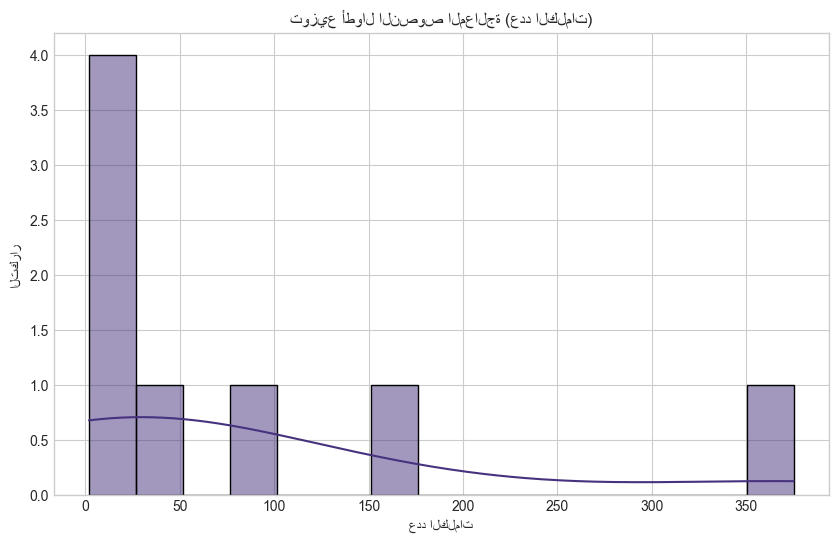

تم العثور على الخط التالي لسحابة الكلمات: C:/Windows/Fonts/Tahoma.ttf


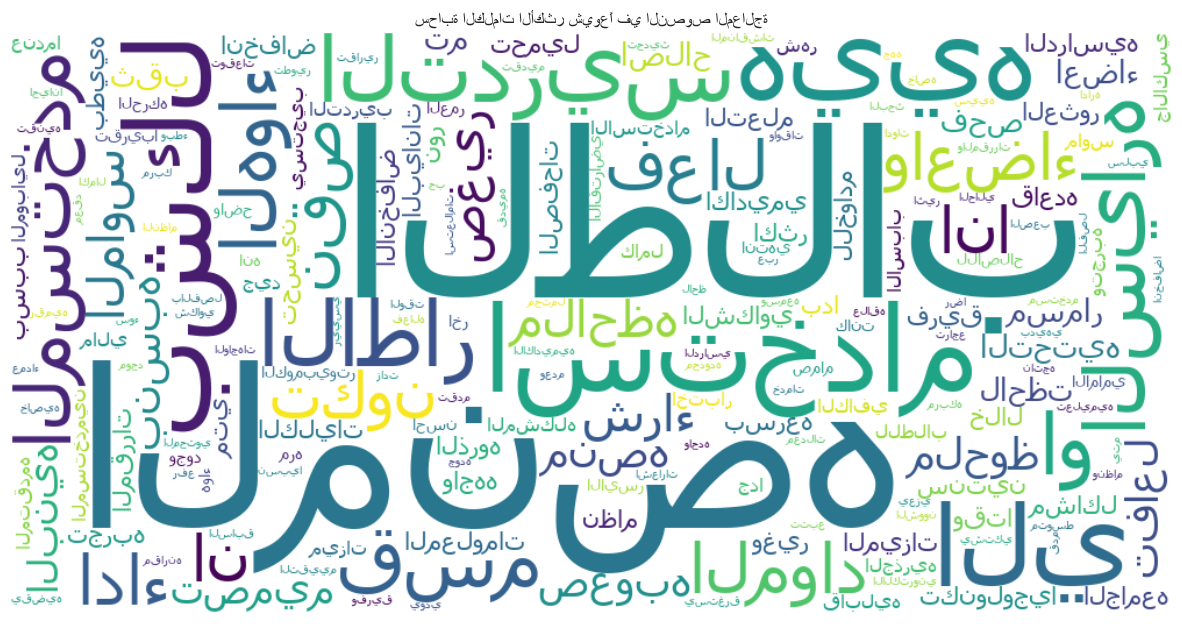

In [7]:
# الخلية 5: استكشاف عمود processed_text
if not df.empty and 'processed_text' in df.columns:
    print("\n--- استكشاف عمود processed_text ---")
    
    # عرض عينة من النصوص المعالجة
    print("\nعينة من النصوص في 'processed_text':")
    for i, text in enumerate(df['processed_text'].head().tolist()): # عرض أول 5 نصوص
        print(f"النص {i+1}: {text}")

    # حساب طول النصوص المعالجة
    # تأكد أن النص ليس None أو float (NaN) قبل محاولة تقسيمه
    df['processed_text_length'] = df['processed_text'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)
    
    print("\nإحصائيات حول طول النصوص المعالجة (عدد الكلمات):")
    display(df['processed_text_length'].describe())
    
    # رسم بياني لتوزيع أطوال النصوص
    plt.figure(figsize=(10, 6))
    # استخدام dropna() لإزالة القيم التي قد تكون NaN في الطول إذا كانت النصوص الأصلية NaN بالكامل
    sns.histplot(df['processed_text_length'].dropna(), kde=True, bins=15) 
    plt.title('توزيع أطوال النصوص المعالجة (عدد الكلمات)')
    plt.xlabel('عدد الكلمات')
    plt.ylabel('التكرار')
    plt.show()
    
    # عرض الكلمات الأكثر شيوعًا (باستخدام WordCloud)
    from wordcloud import WordCloud # تأكد من تثبيت: pip install wordcloud
    
    # دمج جميع النصوص المعالجة في نص واحد كبير
    # تصفية النصوص الفارغة أو التي تحتوي فقط على مسافات، وأيضًا القيم غير النصية
    non_empty_texts = df['processed_text'].dropna().astype(str).loc[df['processed_text'].astype(str).str.strip() != '']
    
    if not non_empty_texts.empty:
        full_processed_text = " ".join(non_empty_texts)

        font_path = None
        if os.name == 'nt': # لنظام ويندوز
            # قائمة بالخطوط الشائعة التي قد تدعم العربية على ويندوز
            # يمكنك إضافة المزيد من المسارات إذا كنت تعرف خطوطًا أخرى
            font_candidates = [
                'C:/Windows/Fonts/Tahoma.ttf',
                'C:/Windows/Fonts/Arial.ttf',
                'C:/Windows/Fonts/times.ttf', # Times New Roman
                'C:/Windows/Fonts/calibri.ttf',
                # يمكنك البحث عن خطوط مثل "NotoNaskhArabic-Regular.ttf" إذا قمت بتثبيتها
            ]
            for fp_candidate in font_candidates:
                if os.path.exists(fp_candidate):
                    font_path = fp_candidate
                    print(f"تم العثور على الخط التالي لسحابة الكلمات: {font_path}")
                    break
            if font_path is None:
                 print("تحذير: لم يتم العثور على خط عربي مناسب تلقائيًا من القائمة المحددة.")
                 print("سحابة الكلمات قد لا تعرض الحروف العربية بشكل صحيح.")
                 print("للحصول على أفضل نتيجة، قم بتنزيل ملف خط عربي (.ttf) مثل 'NotoNaskhArabic' وضعه في مجلد المشروع أو حدد مساره.")
        else: # لأنظمة أخرى (Linux, macOS)
            # في Linux، قد يكون الخط موجودًا في مسارات مثل /usr/share/fonts/truetype/dejavu/DejaVuSans.ttf
            # أو يمكنك تثبيت خطوط عربية وتحديد مسارها.
            # font_path = '/usr/share/fonts/truetype/noto/NotoNaskhArabic-Regular.ttf' # مثال لـ Linux
            print("لم يتم تنفيذ البحث التلقائي عن خط عربي على هذا النظام. قد تحتاج لتحديد font_path يدويًا.")


        try:
            wordcloud = WordCloud(
                width=1000, 
                height=500, 
                background_color='white',
                font_path=font_path, # استخدم المسار الذي تم العثور عليه أو None
                collocations=False, # تجنب حساب الكلمات المتجاورة ككلمة واحدة
                # يمكنك إضافة regexp لتشكيل الكلمات بشكل أفضل إذا لزم الأمر
                # regexp=r"[\w']+" # هذا قد يحسن استخلاص الكلمات العربية المتصلة
            ).generate(full_processed_text)

            plt.figure(figsize=(15, 10))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title('سحابة الكلمات الأكثر شيوعًا في النصوص المعالجة')
            plt.show()
        except Exception as e:
            print(f"خطأ أثناء إنشاء سحابة الكلمات: {e}")
            print("قد يكون السبب هو عدم توفر خط يدعم اللغة العربية أو أن النص المُدخل فارغ تمامًا.")
    else:
        print("لا توجد نصوص غير فارغة في 'processed_text' لإنشاء سحابة الكلمات.")
else:
    print("الـ DataFrame فارغ أو لا يحتوي على عمود 'processed_text'.")


--- استكشاف الأعمدة التاريخية ---

--- العمود التاريخي: date_identified ---
أقدم تاريخ: 2025-05-29 15:01:37.823552
أحدث تاريخ: 2025-06-04 05:55:36.954370
عدد القيم المفقودة (NaT): 0

--- العمود التاريخي: date_closed ---
أقدم تاريخ: 2025-06-03 13:51:18.530444
أحدث تاريخ: 2025-06-03 13:51:18.530444
عدد القيم المفقودة (NaT): 7

--- العمود التاريخي: date_chosen ---
أقدم تاريخ: 2025-05-30 03:55:12.476412
أحدث تاريخ: 2025-06-03 15:39:47.824127
عدد القيم المفقودة (NaT): 5

--- العمود التاريخي: start_date_planned ---
أقدم تاريخ: 2025-06-03 00:00:00
أحدث تاريخ: 2025-06-03 00:00:00
عدد القيم المفقودة (NaT): 6

--- العمود التاريخي: end_date_planned ---
أقدم تاريخ: 2025-05-30 00:00:00
أحدث تاريخ: 2025-06-03 00:00:00
عدد القيم المفقودة (NaT): 5

--- العمود التاريخي: start_date_actual ---
أقدم تاريخ: 2025-06-03 00:00:00
أحدث تاريخ: 2025-06-03 00:00:00
عدد القيم المفقودة (NaT): 7

--- العمود التاريخي: end_date_actual ---
أقدم تاريخ: 2025-06-03 00:00:00
أحدث تاريخ: 2025-07-30 00:00:00
عدد القيم المفق

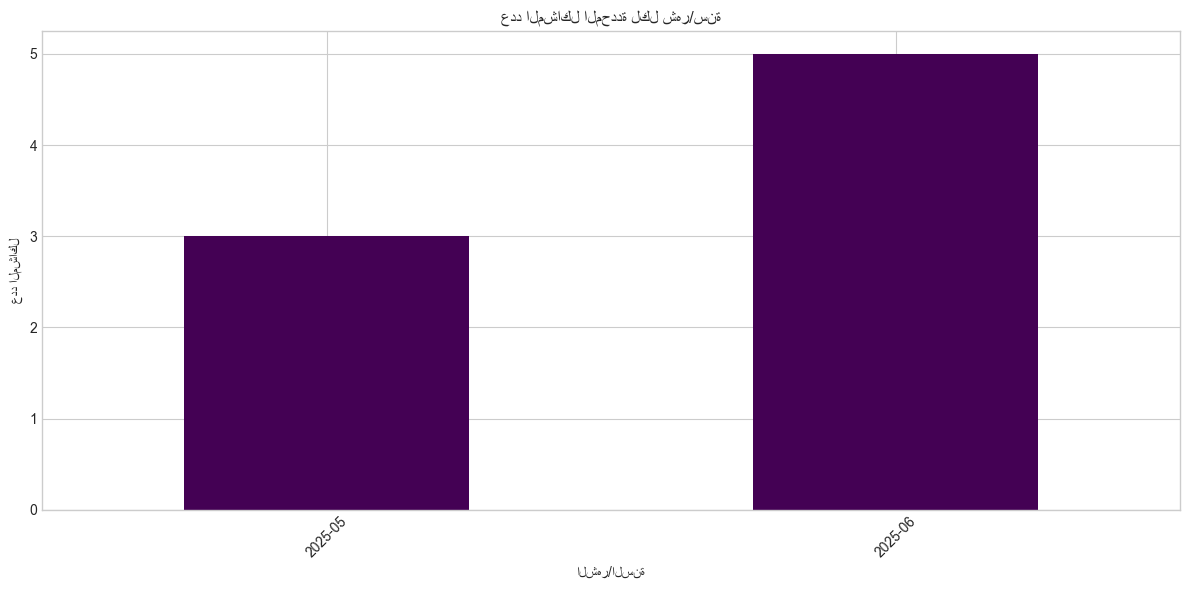


--- توزيع المشاكل المحددة حسب يوم الأسبوع ---
Series([], Name: count, dtype: float64)


In [8]:
# الخلية 6: استكشاف الأعمدة التاريخية (datetime)
if not df.empty:
    print("\n--- استكشاف الأعمدة التاريخية ---")
    
    date_cols = ['date_identified', 'date_closed', 'date_chosen', 
                 'start_date_planned', 'end_date_planned', 
                 'start_date_actual', 'end_date_actual']
    
    # التأكد أن الأعمدة من نوع datetime (يجب أن تكون كذلك من DataPreprocessor)
    # وطباعة النطاق الزمني لكل عمود
    for col in date_cols:
        if col in df.columns and pd.api.types.is_datetime64_any_dtype(df[col]):
            print(f"\n--- العمود التاريخي: {col} ---")
            print(f"أقدم تاريخ: {df[col].min()}")
            print(f"أحدث تاريخ: {df[col].max()}")
            print(f"عدد القيم المفقودة (NaT): {df[col].isnull().sum()}")
        elif col in df.columns:
            print(f"تحذير: العمود {col} ليس من نوع datetime. نوعه الحالي: {df[col].dtype}")

    # تحليل توزيع المشاكل المحددة عبر الزمن (باستخدام 'date_identified')
    if 'date_identified' in df.columns and pd.api.types.is_datetime64_any_dtype(df['date_identified']):
        # استخلاص السنة والشهر من تاريخ التحديد
        df_temp_dates = df.dropna(subset=['date_identified']).copy() # العمل على نسخة لتجنب SettingWithCopyWarning
        df_temp_dates['year_identified'] = df_temp_dates['date_identified'].dt.year
        df_temp_dates['month_identified'] = df_temp_dates['date_identified'].dt.month
        df_temp_dates['year_month_identified'] = df_temp_dates['date_identified'].dt.to_period('M')

        print("\n--- توزيع المشاكل المحددة عبر الشهور/السنوات ---")
        problems_by_month_year = df_temp_dates['year_month_identified'].value_counts().sort_index()
        print(problems_by_month_year)
        
        if not problems_by_month_year.empty:
            plt.figure(figsize=(12, 6))
            problems_by_month_year.plot(kind='bar', colormap='viridis')
            plt.title('عدد المشاكل المحددة لكل شهر/سنة')
            plt.xlabel('الشهر/السنة')
            plt.ylabel('عدد المشاكل')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            
        # مثال آخر: توزيع المشاكل حسب يوم الأسبوع الذي تم تحديدها فيه
        df_temp_dates['day_of_week_identified'] = df_temp_dates['date_identified'].dt.day_name(locale='ar_SA.utf8') # للحصول على أسماء الأيام بالعربية
        
        print("\n--- توزيع المشاكل المحددة حسب يوم الأسبوع ---")
        problems_by_day_of_week = df_temp_dates['day_of_week_identified'].value_counts()
        # ترتيب أيام الأسبوع بشكل صحيح (اختياري ولكنه أفضل للعرض)
        days_ordered = ["الإثنين", "الثلاثاء", "الأربعاء", "الخميس", "الجمعة", "السبت", "الأحد"] # ترتيب حسب ما تفضله
        try:
            problems_by_day_of_week = problems_by_day_of_week.reindex(days_ordered).dropna()
        except KeyError:
            print("لم يتم العثور على بعض أسماء أيام الأسبوع العربية. قد تحتاج إلى تعديل قائمة 'days_ordered' أو التأكد من إعدادات اللغة.")
            
        print(problems_by_day_of_week)

        if not problems_by_day_of_week.empty:
            plt.figure(figsize=(10, 6))
            problems_by_day_of_week.plot(kind='bar', colormap='viridis')
            plt.title('عدد المشاكل المحددة لكل يوم من أيام الأسبوع')
            plt.xlabel('يوم الأسبوع')
            plt.ylabel('عدد المشاكل')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
    else:
        print("العمود 'date_identified' غير موجود أو ليس من نوع datetime لتحليل التوزيع الزمني.")
        
else:
    print("الـ DataFrame فارغ.")


--- استكشاف العلاقات بين المتغيرات ---


C:\Users\pc\AppData\Local\Temp\ipykernel_380\3848626664.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df.dropna(subset=['domain', 'estimated_cost_numeric']), x='domain', y='estimated_cost_numeric', palette="viridis")


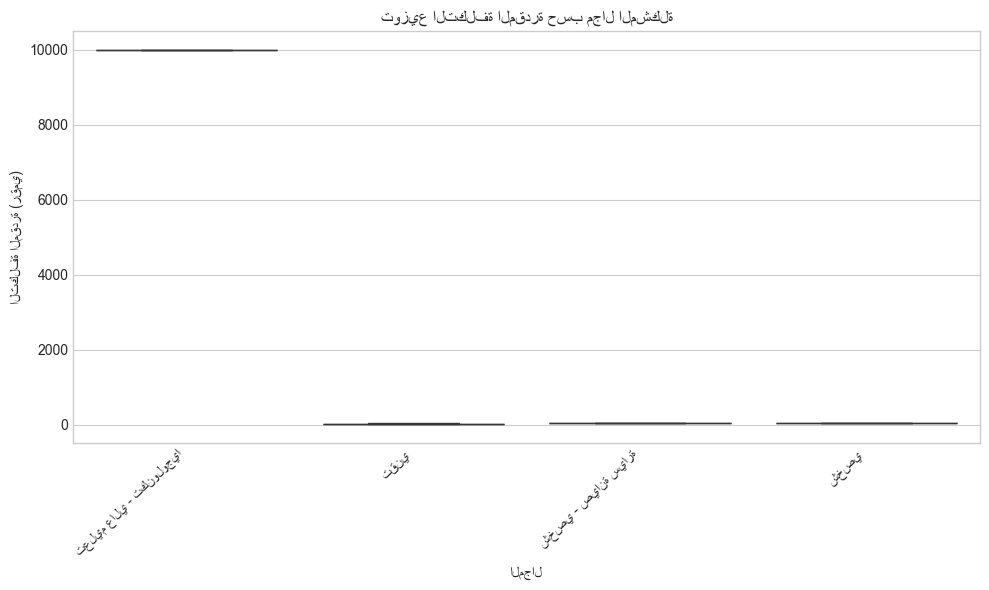


متوسط التكلفة المقدرة لكل مجال:


domain
تعليم عالي - تكنولوجيا   10000.00
شخصي                        35.00
شخصي - صيانة سيارة          35.00
تقني                        20.00
Name: estimated_cost_numeric, dtype: float64

C:\Users\pc\AppData\Local\Temp\ipykernel_380\3848626664.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df.dropna(subset=['complexity_level', 'estimated_time_days']), x='complexity_level', y='estimated_time_days', palette="viridis", order=['بسيط', 'متوسط', 'عالي']) # ترتيب المستويات


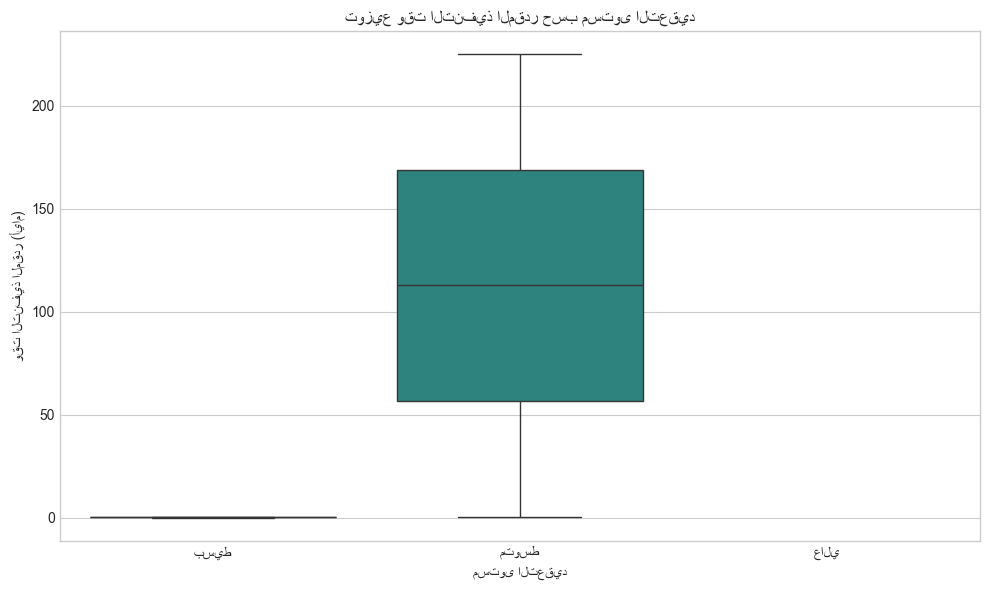


متوسط وقت التنفيذ المقدر لكل مستوى تعقيد:


complexity_level
بسيط      0.43
متوسط   112.82
عالي       NaN
Name: estimated_time_days, dtype: float64

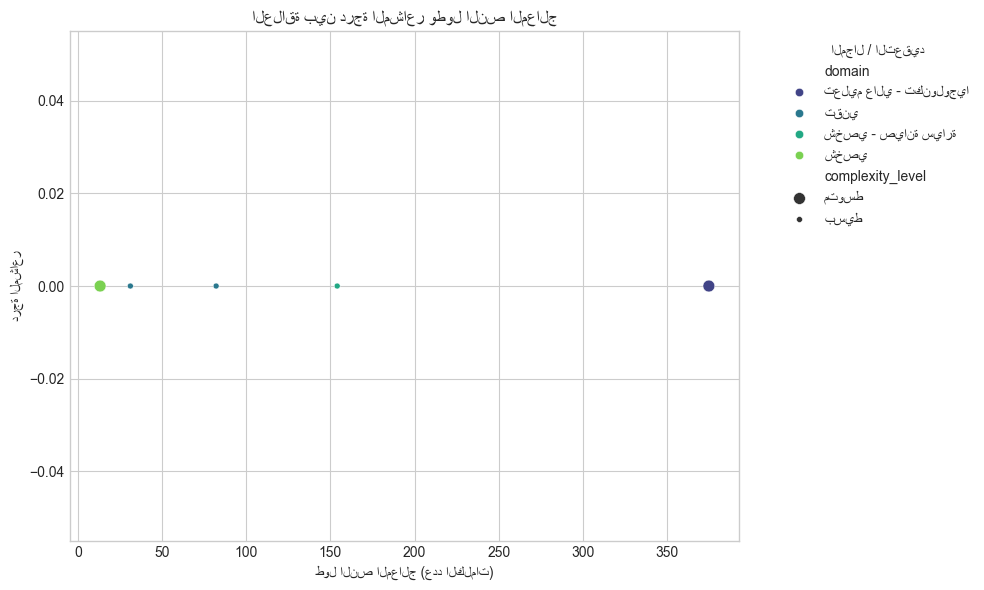

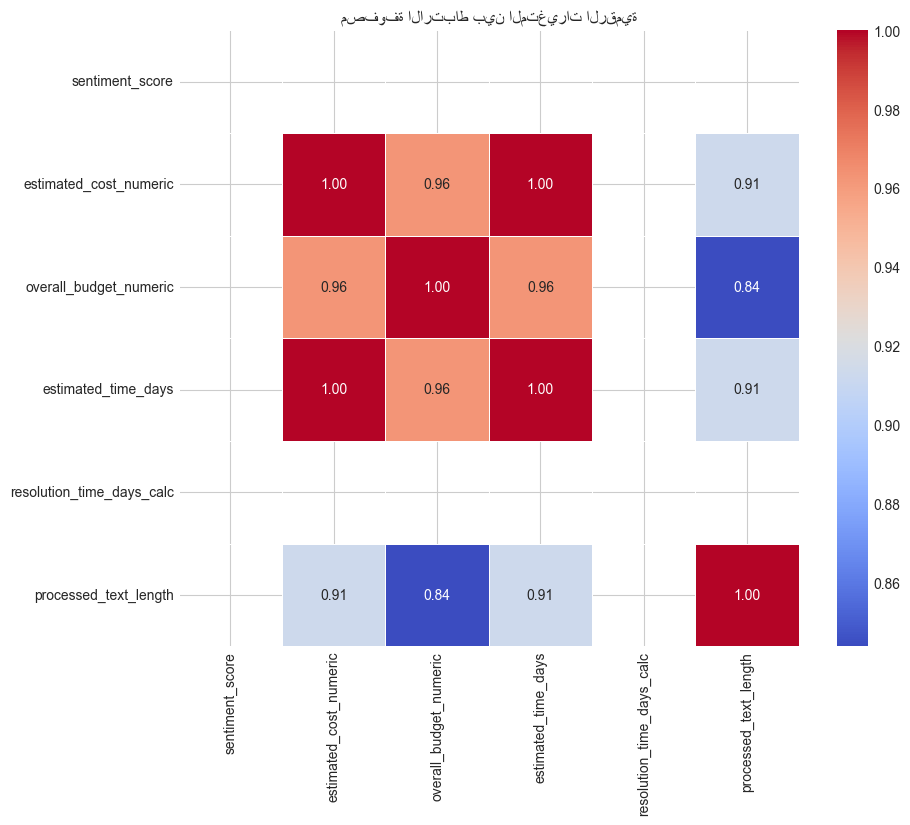


مصفوفة الارتباط:


,sentiment_score,estimated_cost_numeric,overall_budget_numeric,estimated_time_days,resolution_time_days_calc,processed_text_length
sentiment_score,NaN,NaN,NaN,NaN,NaN,NaN
estimated_cost_numeric,NaN,1.00,0.96,1.00,NaN,0.91
overall_budget_numeric,NaN,0.96,1.00,0.96,NaN,0.84
estimated_time_days,NaN,1.00,0.96,1.00,NaN,0.91
resolution_time_days_calc,NaN,NaN,NaN,NaN,NaN,NaN
processed_text_length,NaN,0.91,0.84,0.91,NaN,1.00


In [9]:
# الخلية 7: استكشاف العلاقات بين المتغيرات (أمثلة أولية)
if not df.empty:
    print("\n--- استكشاف العلاقات بين المتغيرات ---")

    # 1. العلاقة بين المجال (domain) والتكلفة المقدرة (estimated_cost_numeric)
    if 'domain' in df.columns and 'estimated_cost_numeric' in df.columns:
        plt.figure(figsize=(10, 6))
        # استخدام dropna() لإزالة الصفوف التي تحتوي على NaN في أي من العمودين قبل الرسم
        sns.boxplot(data=df.dropna(subset=['domain', 'estimated_cost_numeric']), x='domain', y='estimated_cost_numeric', palette="viridis")
        plt.title('توزيع التكلفة المقدرة حسب مجال المشكلة')
        plt.xlabel('المجال')
        plt.ylabel('التكلفة المقدرة (رقمي)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        print("\nمتوسط التكلفة المقدرة لكل مجال:")
        display(df.groupby('domain')['estimated_cost_numeric'].mean().sort_values(ascending=False))
    else:
        print("الأعمدة 'domain' أو 'estimated_cost_numeric' غير موجودة.")

    # 2. العلاقة بين مستوى التعقيد (complexity_level) ووقت التنفيذ المقدر (estimated_time_days)
    if 'complexity_level' in df.columns and 'estimated_time_days' in df.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df.dropna(subset=['complexity_level', 'estimated_time_days']), x='complexity_level', y='estimated_time_days', palette="viridis", order=['بسيط', 'متوسط', 'عالي']) # ترتيب المستويات
        plt.title('توزيع وقت التنفيذ المقدر حسب مستوى التعقيد')
        plt.xlabel('مستوى التعقيد')
        plt.ylabel('وقت التنفيذ المقدر (أيام)')
        plt.tight_layout()
        plt.show()

        print("\nمتوسط وقت التنفيذ المقدر لكل مستوى تعقيد:")
        display(df.groupby('complexity_level')['estimated_time_days'].mean().reindex(['بسيط', 'متوسط', 'عالي']))
    else:
        print("الأعمدة 'complexity_level' أو 'estimated_time_days' غير موجودة.")

    # 3. العلاقة بين درجة المشاعر (sentiment_score) وطول النص المعالج (processed_text_length)
    if 'sentiment_score' in df.columns and 'processed_text_length' in df.columns:
        plt.figure(figsize=(10, 6))
        # استخدام dropna() هنا أيضًا
        sns.scatterplot(data=df.dropna(subset=['sentiment_score', 'processed_text_length']), x='processed_text_length', y='sentiment_score', palette="viridis", hue='domain', size='complexity_level') # إضافة أبعاد أخرى للون والحجم
        plt.title('العلاقة بين درجة المشاعر وطول النص المعالج')
        plt.xlabel('طول النص المعالج (عدد الكلمات)')
        plt.ylabel('درجة المشاعر')
        plt.legend(title='المجال / التعقيد', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    else:
        print("الأعمدة 'sentiment_score' أو 'processed_text_length' غير موجودة.")
        
    # 4. (اختياري) مصفوفة الارتباط (Correlation Matrix) للأعمدة الرقمية
    numeric_cols_for_corr = ['sentiment_score', 'estimated_cost_numeric', 
                             'overall_budget_numeric', 'estimated_time_days', 
                             'resolution_time_days_calc', 'processed_text_length']
    # تأكد من وجود هذه الأعمدة وأنها رقمية
    existing_numeric_cols_for_corr = [col for col in numeric_cols_for_corr if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]
    
    if len(existing_numeric_cols_for_corr) > 1:
        correlation_matrix = df[existing_numeric_cols_for_corr].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('مصفوفة الارتباط بين المتغيرات الرقمية')
        plt.show()
        
        print("\nمصفوفة الارتباط:")
        display(correlation_matrix)
    else:
        print("لا توجد أعمدة رقمية كافية لحساب مصفوفة الارتباط.")
else:
    print("الـ DataFrame فارغ.")

In [10]:
## ملخص الاستنتاجات الأولية من استكشاف البيانات (EDA)

- **حجم البيانات:** تم تحليل 8 مشاكل. البيانات لا تزال في طور التجميع، والعديد من الحقول تحتوي على قيم مفقودة.
- **الأعمدة الفئوية:** 
    - `domain`: الأكثر شيوعًا "تقني"، مع وجود قيم مفقودة.
    - `complexity_level`: "بسيط" هو الأكثر شيوعًا، مع وجود قيم مفقودة.
    - `status`: "مفتوحة" هي السائدة.
    - `sentiment_label`: "محايد" بشكل كبير.
- **الأعمدة الرقمية:**
    - `sentiment_score`: حاليًا كلها 0.0.
    - `estimated_cost_numeric`, `overall_budget_numeric`, `estimated_time_days`: تم تحويلها إلى أرقام بنجاح، ولكن تأثرت الإحصائيات بملء القيم المفقودة بالوسيط.
    - `resolution_time_days_calc`: قيمة واحدة فقط متاحة.
- **النصوص (`processed_text`):**
    - تم تنظيف النصوص بشكل جيد، وإزالة كلمة "none" المضمنة.
    - أطوال النصوص متباينة، مع وجود بعض النصوص الطويلة جدًا.
    - سحابة الكلمات أظهرت مصطلحات شائعة مثل "طلاب"، "منصة"، "مشكلة".
- **الأعمدة التاريخية:** تم تحويلها بنجاح، ولكن البيانات الزمنية محدودة حاليًا.
- **العلاقات الأولية:**
    - لوحظ ارتباط إيجابي بين التكلفة، الميزانية، وقت التنفيذ، وطول النص. يجب تفسير هذا بحذر.
- **التحديات والخطوات التالية:**
    - الحاجة إلى المزيد من البيانات المكتملة لتحسين موثوقية التحليلات والنماذج.
    - تحسين آلية حساب `sentiment_score` إذا أمكن.
    - اختيار الميزات النهائية وتجهيزها للنماذج (ترميز، تحجيم، vectorization).

SyntaxError: invalid character '،' (U+060C) (2549037918.py, line 3)

In [11]:
# الخلية 9: تحديد الميزات التي سيتم استخدامها في النماذج (مبدئي)

if not df.empty:
    # الميزات النصية (سيتم عمل vectorization لها)
    text_feature_col = 'processed_text'
    print(f"الميزة النصية الرئيسية: {text_feature_col}")

    # الميزات الرقمية (التي تم إنشاؤها أو الأصلية)
    # (نستبعد resolution_time_days_calc مؤقتًا بسبب كثرة القيم المفقودة)
    # (نستبعد sentiment_score مؤقتًا لأنه ثابت حاليًا)
    numerical_features = ['estimated_cost_numeric', 'overall_budget_numeric', 
                          'estimated_time_days', 'processed_text_length']
    # التأكد من وجود هذه الأعمدة
    numerical_features = [col for col in numerical_features if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]
    print(f"الميزات الرقمية المختارة: {numerical_features}")

    # الميزات الفئوية (سيتم عمل one-hot encoding لها)
    categorical_features_to_encode = ['domain', 'complexity_level', 'status', 'problem_source', 'sentiment_label']
    # التأكد من وجود هذه الأعمدة
    categorical_features_to_encode = [col for col in categorical_features_to_encode if col in df.columns]
    print(f"الميزات الفئوية للترميز: {categorical_features_to_encode}")

    # --- التعامل مع القيم المفقودة في الميزات المختارة قبل التجهيز للنماذج ---
    # للميزات الرقمية: يمكننا ملء NaN بالوسيط مرة أخرى (لضمان عدم وجود NaN تدخل النماذج)
    # أو يمكننا استخدام Imputer من sklearn لاحقًا في خط أنابيب النموذج
    for col in numerical_features:
        if df[col].isnull().any():
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"تم ملء القيم المفقودة في '{col}' بالوسيط: {median_val}")

    # للميزات الفئوية: يمكننا ملء NaN بفئة "Unknown" أو ما شابه
    for col in categorical_features_to_encode:
        if df[col].isnull().any():
            # تأكد أن نوع العمود هو نصي قبل ملء بـ "Unknown"
            if not pd.api.types.is_string_dtype(df[col]) and pd.api.types.is_object_dtype(df[col]):
                # إذا كان object ولكنه ليس string (قد يكون خليطًا)، حوله لـ string أولاً
                df[col] = df[col].astype(str) 
            
            df[col].fillna('Unknown', inplace=True) # أو 'غير معروف'
            print(f"تم ملء القيم المفقودة في '{col}' بـ 'Unknown'")
            
    # للميزة النصية: تأكد أنها كلها نصوص وأن القيم المفقودة تم التعامل معها (يجب أن يكون كذلك من DataPreprocessor)
    if df[text_feature_col].isnull().any():
        df[text_feature_col].fillna('', inplace=True)
        print(f"تم ملء القيم المفقودة في '{text_feature_col}' بنص فارغ.")


    print("\n--- نظرة على البيانات بعد معالجة القيم المفقودة للميزات المختارة ---")
    display(df[numerical_features + categorical_features_to_encode + [text_feature_col]].head())
    print("\nالتحقق من القيم المفقودة المتبقية في الميزات المختارة:")
    print(df[numerical_features + categorical_features_to_encode + [text_feature_col]].isnull().sum())

else:
    print("الـ DataFrame فارغ.")

الميزة النصية الرئيسية: processed_text
الميزات الرقمية المختارة: ['estimated_cost_numeric', 'overall_budget_numeric', 'estimated_time_days', 'processed_text_length']
الميزات الفئوية للترميز: ['domain', 'complexity_level', 'status', 'problem_source', 'sentiment_label']
تم ملء القيم المفقودة في 'domain' بـ 'Unknown'
تم ملء القيم المفقودة في 'complexity_level' بـ 'Unknown'
تم ملء القيم المفقودة في 'problem_source' بـ 'Unknown'
تم ملء القيم المفقودة في 'sentiment_label' بـ 'Unknown'

--- نظرة على البيانات بعد معالجة القيم المفقودة للميزات المختارة ---


C:\Users\pc\AppData\Local\Temp\ipykernel_380\2912824722.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True) # أو 'غير معروف'
C:\Users\pc\AppData\Local\Temp\ipykernel_380\2912824722.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

,estimated_cost_numeric,overall_budget_numeric,estimated_time_days,processed_text_length,domain,complexity_level,status,problem_source,sentiment_label,processed_text
0,35.00,50.00,0.65,3,nan,nan,مفتوحة,nan,محايد,حب جهه واحده
1,10000.00,200.00,225.00,375,تعليم عالي - تكنولوجيا,متوسط,مفتوحة,تقارير استخدام النظام + شكاوى الطلاب.,nan,انخفاض ملحوظ تفاعل الطلاب منصه التعلم الالكترو...
2,35.00,50.00,0.65,10,nan,nan,مفتوحة,nan,محايد,مفاتيح السياره ضاعت مني ذهبت الي النادي بعدها ...
3,35.00,50.00,0.65,2,nan,nan,مفتوحة,nan,محايد,اختناق مروري
4,35.00,50.00,0.65,31,تقني,بسيط,قيد التحليل,ملاحظة,محايد,موبايل مكسور جوالي نوع جالاكسي اشتريته شركه جا...



التحقق من القيم المفقودة المتبقية في الميزات المختارة:
estimated_cost_numeric    0
overall_budget_numeric    0
estimated_time_days       0
processed_text_length     0
domain                    0
complexity_level          0
status                    0
problem_source            0
sentiment_label           0
processed_text            0
dtype: int64


In [12]:
# الخلية 10: ترميز، تحجيم، وتحويل النصوص للميزات المختارة

if not df.empty:
    print("\n--- تجهيز الميزات النهائية للنماذج ---")

    # --- 1. ترميز الأعمدة الفئوية باستخدام One-Hot Encoding ---
    if categorical_features_to_encode: # تأكد أن القائمة ليست فارغة
        print(f"\nتطبيق One-Hot Encoding على الأعمدة: {categorical_features_to_encode}...")
        # استخدام pd.get_dummies للسهولة، مع drop_first=True لتقليل الأبعاد وتجنب الارتباط الخطي المتعدد
        # prefix و prefix_sep لإعطاء أسماء واضحة للأعمدة الجديدة
        df_encoded_categorical = pd.get_dummies(df[categorical_features_to_encode], 
                                                prefix=categorical_features_to_encode, 
                                                prefix_sep='_', 
                                                dummy_na=False, # لا ننشئ عمودًا لـ NaN لأننا ملأناها بـ "Unknown"
                                                drop_first=True) # مهم لبعض النماذج
        
        print(f"أبعاد مصفوفة الميزات الفئوية المرمزة: {df_encoded_categorical.shape}")
        display(df_encoded_categorical.head())
        
        # حذف الأعمدة الفئوية الأصلية من df الرئيسي وإضافة المرمزة
        df_features = df.drop(columns=categorical_features_to_encode)
        df_features = pd.concat([df_features, df_encoded_categorical], axis=1)
    else:
        print("لا توجد أعمدة فئوية محددة للترميز.")
        df_features = df.copy() # استمر مع df الأصلي إذا لم يكن هناك ترميز فئوي

    # --- 2. تحجيم الأعمدة الرقمية باستخدام StandardScaler ---
    from sklearn.preprocessing import StandardScaler

    if numerical_features: # تأكد أن القائمة ليست فارغة
        print(f"\nتطبيق StandardScaler على الأعمدة الرقمية: {numerical_features}...")
        scaler = StandardScaler()
        # fit_transform على البيانات الرقمية المختارة
        # تأكد أن هذه الأعمدة موجودة في df_features (يجب أن تكون كذلك)
        scaled_numerical_data = scaler.fit_transform(df_features[numerical_features])
        
        # تحويل الناتج إلى DataFrame للحفاظ على أسماء الأعمدة
        df_scaled_numerical = pd.DataFrame(scaled_numerical_data, 
                                           columns=numerical_features, 
                                           index=df_features.index) # الحفاظ على الفهرس الأصلي

        print(f"أبعاد مصفوفة الميزات الرقمية المحجمة: {df_scaled_numerical.shape}")
        display(df_scaled_numerical.head())

        # استبدال الأعمدة الرقمية الأصلية بالمحجمة في df_features
        df_features.drop(columns=numerical_features, inplace=True)
        df_features = pd.concat([df_features, df_scaled_numerical], axis=1)
    else:
        print("لا توجد أعمدة رقمية محددة للتحجيم.")

    # --- 3. تحويل النصوص إلى ميزات رقمية باستخدام TfidfVectorizer ---
    from sklearn.feature_extraction.text import TfidfVectorizer

    if text_feature_col in df_features.columns:
        print(f"\nتطبيق TfidfVectorizer على العمود النصي: {text_feature_col}...")
        
        # تأكد أن العمود يحتوي على نصوص فقط (يجب أن يكون كذلك بعد المعالجة)
        # TfidfVectorizer يتوقع iterable of strings
        corpus = df_features[text_feature_col].astype(str).tolist()

        # يمكنك ضبط معاملات TfidfVectorizer (مثل max_features, ngram_range, min_df, max_df)
        # max_features: يحدد عدد أهم الكلمات التي سيتم أخذها في الاعتبار
        # بما أن لدينا 8 مستندات فقط، قد لا نرغب في تحديد max_features بشكل كبير جدًا
        # أو يمكننا تركه ليحدد كل الميزات الممكنة حاليًا
        tfidf_vectorizer = TfidfVectorizer(max_features=100, # مثال: خذ أهم 100 كلمة
                                           ngram_range=(1, 2), # خذ كلمات مفردة وثنائية
                                           min_df=1, # تجاهل الكلمات التي تظهر في أقل من مستند واحد (يعني لا تتجاهل شيئًا هنا)
                                           max_df=0.95) # تجاهل الكلمات التي تظهر في أكثر من 95% من المستندات

        tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
        
        # تحويل مصفوفة TF-IDF المتفرقة إلى DataFrame (قد يكون كبيرًا إذا كان عدد الميزات كبيرًا)
        # لأغراض العرض، يمكننا تحويله. للنماذج، يمكن استخدام المصفوفة المتفرقة مباشرة.
        df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), 
                                columns=tfidf_vectorizer.get_feature_names_out(),
                                index=df_features.index) # الحفاظ على الفهرس

        print(f"أبعاد مصفوفة TF-IDF: {df_tfidf.shape}")
        print(f"عدد الميزات النصية الناتجة (الكلمات/الـ n-grams): {len(tfidf_vectorizer.get_feature_names_out())}")
        print("عينة من ميزات TF-IDF (أول 5 ميزات):")
        display(df_tfidf.iloc[:, :5].head()) # عرض أول 5 ميزات نصية

        # حذف العمود النصي الأصلي من df_features وإضافة مصفوفة TF-IDF
        df_features.drop(columns=[text_feature_col, 'combined_text_for_nlp'], inplace=True, errors='ignore') # errors='ignore' لتجنب الخطأ إذا كان العمود محذوفًا بالفعل
        df_features = pd.concat([df_features, df_tfidf], axis=1)
    else:
        print(f"العمود النصي '{text_feature_col}' غير موجود للتvectorization.")

    # --- 4. دمج جميع الميزات ---
    # df_features يحتوي الآن على جميع الميزات المجهزة
    # (الأعمدة الأصلية غير المستخدمة + الفئوية المرمزة + الرقمية المحجمة + النصوص المحولة)
    # قد تحتاج إلى حذف أعمدة إضافية غير مرغوب فيها (مثل problem_id, title الأصلي، إلخ)
    # قبل تشكيل مصفوفة X النهائية
    
    # تحديد الأعمدة التي لا نريدها في مصفوفة الميزات النهائية X
    # (احتفظ بها في df_features إذا أردت الرجوع إليها أو ربطها بنتائج النموذج)
    columns_to_drop_for_X = ['problem_id', 'title', 'description_initial', 
                             'date_identified', 'date_closed', 'status', # status الأصلي تم ترميزه
                             'stakeholders_involved', 'initial_impact_assessment', 
                             'problem_source', # تم ترميزه
                             'refined_problem_statement_final', 'sentiment_label', # تم ترميزه
                             'problem_tags', 'ai_generated_summary', 
                             'active_listening_notes', 'key_questions_asked', 
                             'initial_data_sources', 'initial_hypotheses', 
                             'stakeholder_feedback_initial', 'data_collection_methods_deep',
                             'data_analysis_techniques_used', 'key_findings_from_analysis',
                             'justification_for_choice', 'approval_status', # الأصلي تم ترميزه (إذا كان في القائمة)
                             'date_chosen', 'solution_description', 'generation_method',
                             'estimated_cost', 'estimated_time_to_implement', 'potential_benefits',
                             'potential_risks', 'plan_description', 'implementation_status', # الأصلي تم ترميزه (إذا كان في القائمة)
                             'start_date_planned', 'end_date_planned', 'start_date_actual',
                             'end_date_actual', 'overall_budget', 'key_personnel',
                             'what_went_well', 'what_could_be_improved', 
                             'recommendations_for_future', 'key_takeaways', 
                             'potential_root_causes_list'] 
                             # أيضًا أعمدة نصية مثل combined_text_for_nlp إذا لم يتم حذفها
                             # وأعمدة فئوية ورقمية أصلية إذا تم استبدالها.

    # الحصول على قائمة الأعمدة الموجودة فعليًا في df_features من قائمة الحذف
    existing_columns_to_drop = [col for col in columns_to_drop_for_X if col in df_features.columns]

    X_final_features = df_features.drop(columns=existing_columns_to_drop, errors='ignore')

    print("\n--- مصفوفة الميزات النهائية X_final_features (أول 5 صفوف) ---")
    print(f"أبعاد مصفوفة الميزات النهائية X: {X_final_features.shape}")
    display(X_final_features.head())
    
    print("\nالتحقق من القيم المفقودة في X_final_features:")
    print(X_final_features.isnull().sum().sum()) # يجب أن يكون المجموع صفرًا

    # يمكنك حفظ X_final_features أو df_features (الذي يحتوي على كل شيء) إذا أردت
    # df_features.to_csv('data/processed/features_for_modeling.csv', index=False)
    # X_final_features.to_csv('data/processed/X_final_matrix.csv', index=False)

else:
    print("الـ DataFrame فارغ.")


--- تجهيز الميزات النهائية للنماذج ---

تطبيق One-Hot Encoding على الأعمدة: ['domain', 'complexity_level', 'status', 'problem_source', 'sentiment_label']...
أبعاد مصفوفة الميزات الفئوية المرمزة: (8, 12)


,domain_تعليم عالي - تكنولوجيا,domain_تقني,domain_شخصي,domain_شخصي - صيانة سيارة,complexity_level_بسيط,complexity_level_متوسط,status_مغلقة,status_مفتوحة,problem_source_تقارير استخدام النظام + شكاوى الطلاب.,problem_source_ملاحظة,problem_source_ملاحظة شخصية عند فحص السيارة,sentiment_label_محايد
0,False,False,False,False,False,False,False,True,False,False,False,True
1,True,False,False,False,False,True,False,True,True,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,False,False,False,True,False,False,False,True
4,False,True,False,False,True,False,False,False,False,True,False,True



تطبيق StandardScaler على الأعمدة الرقمية: ['estimated_cost_numeric', 'overall_budget_numeric', 'estimated_time_days', 'processed_text_length']...
أبعاد مصفوفة الميزات الرقمية المحجمة: (8, 4)


,estimated_cost_numeric,overall_budget_numeric,estimated_time_days,processed_text_length
0,-0.38,-0.24,-0.38,-0.67
1,2.65,2.54,2.65,2.42
2,-0.38,-0.24,-0.38,-0.61
3,-0.38,-0.24,-0.38,-0.68
4,-0.38,-0.24,-0.38,-0.44



تطبيق TfidfVectorizer على العمود النصي: processed_text...
أبعاد مصفوفة TF-IDF: (8, 100)
عدد الميزات النصية الناتجة (الكلمات/الـ n-grams): 100
عينة من ميزات TF-IDF (أول 5 ميزات):


,اداء,استخدام,اصلاح,اعضاء,اعضاء هييه
0,0.00,0.00,0.00,0.00,0.00
1,0.14,0.15,0.00,0.10,0.10
2,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00



--- مصفوفة الميزات النهائية X_final_features (أول 5 صفوف) ---
أبعاد مصفوفة الميزات النهائية X: (8, 118)


,sentiment_score,resolution_time_days_calc,domain_تعليم عالي - تكنولوجيا,domain_تقني,domain_شخصي,domain_شخصي - صيانة سيارة,complexity_level_بسيط,complexity_level_متوسط,status_مغلقة,status_مفتوحة,problem_source_تقارير استخدام النظام + شكاوى الطلاب.,problem_source_ملاحظة,problem_source_ملاحظة شخصية عند فحص السيارة,sentiment_label_محايد,estimated_cost_numeric,overall_budget_numeric,estimated_time_days,processed_text_length,اداء,استخدام,اصلاح,اعضاء,اعضاء هييه,اكاديمي,اكثر,الاسباب,الاسباب الجذريه,الاستخدام,الاطار,الاطار الامامي,الافتراضي,البنيه,البنيه التحتيه,التحتيه,التدريس,السياره,الطلاب,الطلاب منصه,الماوس,المستخدم,المنصه,المواد,الهواء,الي,ان,انا,او,بدا,بسبب,بسرعه,بشكل,بنسبه,تجربه,تحسين,تصميم,تفاعل,تفاعل الطلاب,تقريبا,تكون,تم,تم فحص,ثقب,ثقب صغير,جالاكسي,جدا,جيد,خلال,سنتين,شراء,شراء احسن,شهر,صعوبه,صغير,صمام,صمام الهواء,عندما,فحص,فريق,فعال,قابليه,قابليه الاستخدام,قاعده,قاعده البيانات,قسم,قسم المواد,قسم تكنولوجيا,كامل,كانت,لاحظت,للاصلاح,للخوادم,للطلاب,للطلاب واعضاء,مالي,مالي ملاحظه,ماوس,متي,مره,مسمار,مسمار صغير,مشاكل,ملاحظه,ملحوظ,منصه,منصه نور,ميزات,ميزات المنصه,نظام,نقص,نقص التدريب,نور,نور اكاديمي,هواء,هييه,هييه التدريس,واجهه,واعضاء,واعضاء هييه
0,0.00,NaN,False,False,False,False,False,False,False,True,False,False,False,True,-0.38,-0.24,-0.38,-0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,NaN,True,False,False,False,False,True,False,True,True,False,False,False,2.65,2.54,2.65,2.42,0.14,0.15,0.00,0.10,0.10,0.07,0.03,0.07,0.07,0.07,0.00,0.00,0.00,0.10,0.10,0.10,0.24,0.00,0.42,0.10,0.00,0.17,0.38,0.14,0.00,0.04,0.03,0.00,0.08,0.03,0.07,0.03,0.17,0.10,0.07,0.07,0.10,0.10,0.07,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.03,0.03,0.07,0.03,0.00,0.00,0.00,0.10,0.00,0.00,0.00,0.00,0.00,0.07,0.14,0.07,0.07,0.07,0.07,0.17,0.07,0.07,0.03,0.00,0.00,0.00,0.07,0.07,0.07,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.07,0.00,0.06,0.10,0.07,0.07,0.07,0.07,0.09,0.07,0.07,0.07,0.00,0.24,0.24,0.07,0.14,0.14
2,0.00,NaN,False,False,False,False,False,False,False,True,False,False,False,True,-0.38,-0.24,-0.38,-0.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,NaN,False,False,False,False,False,False,False,True,False,False,False,True,-0.38,-0.24,-0.38,-0.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,NaN,False,True,False,False,True,False,False,False,False,True,False,True,-0.38,-0.24,-0.38,-0.44,0.00,0.00,0.00,0.00,0.00,0.00,0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.29,0.00,0.00,0.00,0.00,0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,


التحقق من القيم المفقودة في X_final_features:
7
